In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [2]:
#Read data
attr = pd.read_csv('HR+attrition.csv')
attr.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [3]:
# Importing Categorical Columns
attr_cust = attr[['Attrition_status', 'department', 'satisfaction', 'filed_complaint', 'projects', 'recently_promoted', 'salary', 'tenure']]
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [4]:
# Converting satisfaction into categorical variable.
attr_cust['satisfaction'] = attr_cust['satisfaction'].astype('object',copy=False)

In [5]:
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [6]:
attr_cust.shape

(12075, 8)

In [7]:
attr_cust.describe()

,filed_complaint,projects,recently_promoted,tenure
count,12075.000000,12075.000000,12075.000000,12075.000000
mean,0.143188,3.846377,0.021035,3.593292
std,0.350279,1.248489,0.143508,1.515632
min,0.000000,2.000000,0.000000,2.000000
25%,0.000000,3.000000,0.000000,3.000000
50%,0.000000,4.000000,0.000000,3.000000
75%,0.000000,5.000000,0.000000,4.000000
max,1.000000,7.000000,1.000000,10.000000


In [8]:
attr_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Attrition_status   12075 non-null  object
 1   department         12075 non-null  object
 2   satisfaction       12075 non-null  object
 3   filed_complaint    12075 non-null  int64 
 4   projects           12075 non-null  int64 
 5   recently_promoted  12075 non-null  int64 
 6   salary             12075 non-null  object
 7   tenure             12075 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 754.8+ KB


In [9]:
# First we will keep a copy of data
attr_cust_copy = attr_cust.copy()

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
attr_cust = attr_cust.apply(le.fit_transform)
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,0,1,5,0,2,0,0,3
1,0,1,3,0,1,0,2,4
2,0,1,5,0,0,0,2,0
3,0,1,1,1,2,0,2,1
4,0,1,4,0,2,0,2,1


In [11]:
attr_cust.describe()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
count,12075.000000,12075.000000,12075.00000,12075.000000,12075.000000,12075.000000,12075.000000,12075.000000
mean,0.244306,5.364638,5.65648,0.143188,1.846377,0.021035,1.352381,1.576729
std,0.429693,3.176513,2.53805,0.350279,1.248489,0.143508,0.623621,1.449545
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,4.00000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,0.000000,7.000000,6.00000,0.000000,2.000000,0.000000,1.000000,1.000000
75%,0.000000,8.000000,8.00000,0.000000,3.000000,0.000000,2.000000,2.000000
max,1.000000,9.000000,9.00000,1.000000,5.000000,1.000000,2.000000,7.000000


In [12]:
import sys
!{sys.executable} -m pip install kmodes

## Using KModes Clustering on the data
### Hint: KModes(n_clusters= "Number of clusters", init = "Cao", n_init = 1, verbose=1)

In [13]:
# Importing Libraries

from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=3,init='Cao',n_init=1,verbose=1)
fitClusters_cao = km_cao.fit_predict(attr_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 450, cost: 37904.0


In [14]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(attr_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 45722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 41503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 450, cost: 37904.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1287, cost: 34853.0
Run 1, iteration: 2/100, moves: 1588, cost: 34853.0


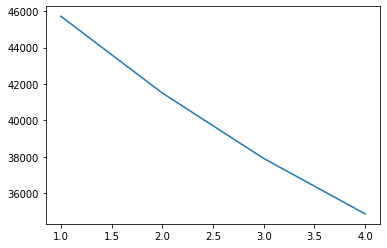

In [15]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [16]:
attr_cust1 = attr_cust_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([attr_cust1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
0,Employed,admin,6,0,4,0,high,5,0
1,Employed,admin,4,0,3,0,medium,6,1
2,Employed,admin,6,0,2,0,medium,2,2
3,Employed,admin,2,1,4,0,medium,3,0
4,Employed,admin,5,0,4,0,medium,3,0


In [17]:
# determining the name of the file 
file_name = 'attrition_solution.xlsx'

In [18]:
# saving the excel 
#combinedDf.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [22]:
data2 = pd.read_excel('attrition_solution.xlsx')

In [23]:
data2.shape

(12075, 10)

In [24]:
data2.head(5)

,Unnamed: 0,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
0,0,Employed,admin,6,0,4,0,high,5,0
1,1,Employed,admin,4,0,3,0,medium,6,1
2,2,Employed,admin,6,0,2,0,medium,2,2
3,3,Employed,admin,2,1,4,0,medium,3,0
4,4,Employed,admin,5,0,4,0,medium,3,0


In [25]:
df1 = data2.query('cluster_predicted==0')

In [26]:
df1.shape

(7657, 10)

In [27]:
df11 = df1.query('Attrition_status== "Employed"')

In [28]:
df11.shape

(6208, 10)

In [29]:
df12 = df1.query('Attrition_status== "Left"')

In [30]:
df12.shape

(1449, 10)

In [31]:
df2= data2.query('cluster_predicted==1')

In [32]:
df2.shape

(2047, 10)

In [33]:
df21 = df2.query('Attrition_status== "Employed"')

In [34]:
df21.shape

(716, 10)

In [35]:
df22 = df2.query('Attrition_status== "Left"')

In [36]:
df22.shape

(1331, 10)

In [37]:
df3  = data2.query('cluster_predicted==2')

In [38]:
df3.shape

(2371, 10)

In [39]:
df31 = df3.query('Attrition_status== "Employed"')

In [40]:
df31.shape

(2201, 10)

In [41]:
df32 = df3.query('Attrition_status== "Left"')

In [42]:
df32.shape

(170, 10)

# Spliting df1 data for cluster0 into two Employed and left

In [43]:
df11 = df1.query('Attrition_status== "Employed"')

In [ ]:
df11.head(5)

In [ ]:
df11.shape

In [ ]:
df12 = df1.query('Attrition_status== "Left"')

In [ ]:
df12.shape

In [ ]:
df12.head(5)

# Cluster 0 Analysis of variables for Employees currently working

Text(0.5, 0, 'Salary class')

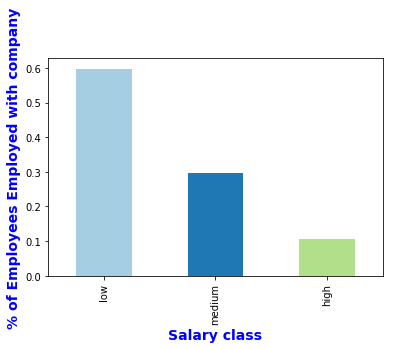

In [40]:
df11['salary'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df11))))
plt.ylabel('% of Employees Employed with company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Salary class', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Number of Projects handled')

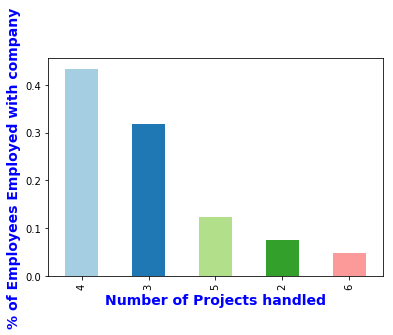

In [41]:
df11['projects'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df11))))
plt.ylabel('% of Employees Employed with company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Number of Projects handled', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Tenure with Company')

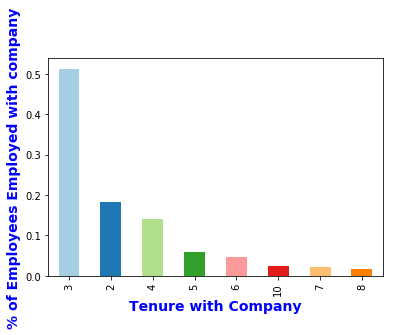

In [42]:
df11['tenure'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df11))))
plt.ylabel('% of Employees Employed with company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Tenure with Company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Satisfaction level with Company')

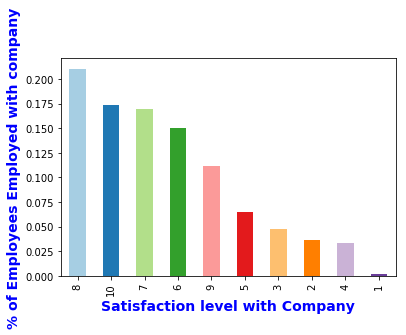

In [43]:
df11['satisfaction'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df11))))
plt.ylabel('% of Employees Employed with company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Satisfaction level with Company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Complaint filed with Company')

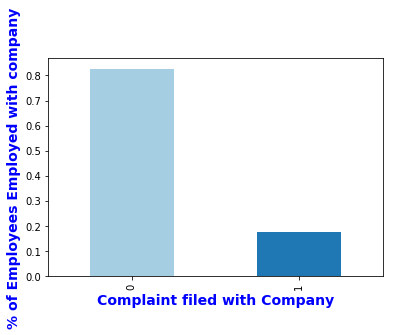

In [44]:
df11['filed_complaint'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df11))))
plt.ylabel('% of Employees Employed with company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Complaint filed with Company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

# Cluster 0 Analysis of variables for Employees who left

Text(0.5, 0, 'Salary class')

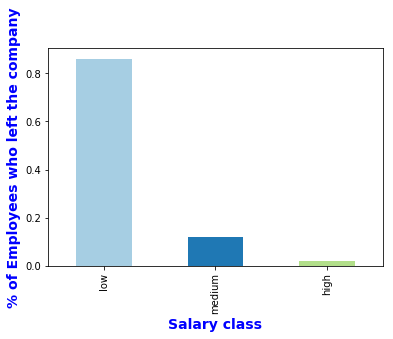

In [45]:
df12['salary'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df12))))
plt.ylabel('% of Employees who left the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Salary class', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Number of Projects handled')

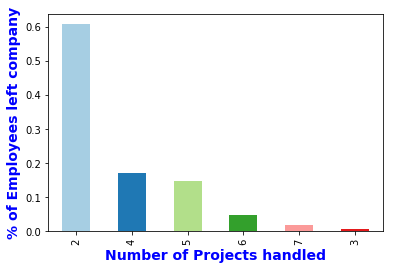

In [46]:
df12['projects'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df12))))
plt.ylabel('% of Employees left company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Number of Projects handled', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Tenure with Company')

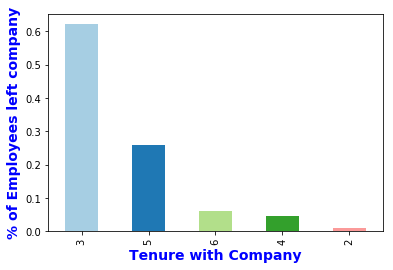

In [47]:
df12['tenure'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df12))))
plt.ylabel('% of Employees left company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Tenure with Company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Satisfaction level with Company')

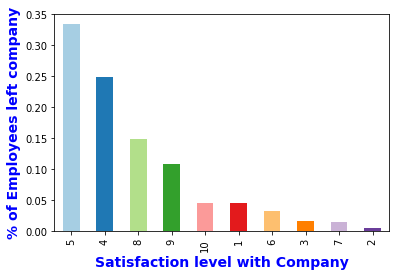

In [48]:
df12['satisfaction'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df12))))
plt.ylabel('% of Employees left company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Satisfaction level with Company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Complaints filed with Company')

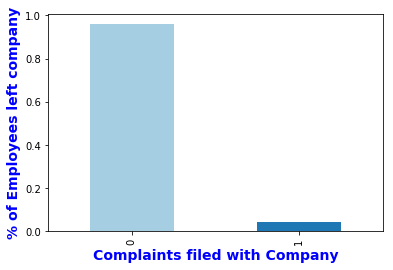

In [49]:
df12['filed_complaint'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df12))))
plt.ylabel('% of Employees left company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Complaints filed with Company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

# Splitting Df2 data for cluster 1 into 2 parts employed and left

In [50]:
df21 = df2.query('Attrition_status=="Employed" ')

In [51]:
df21.head(5)

,Unnamed: 0,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
1,1,Employed,admin,4,0,3,0,medium,6,1
10,10,Employed,admin,10,0,6,0,medium,4,1
21,21,Employed,admin,9,0,3,0,medium,4,1
38,38,Employed,admin,5,0,3,0,medium,4,1
50,50,Employed,admin,9,0,3,0,medium,4,1


# Cluster 1 Analysis of variables for employed employees

Text(0.5, 0, 'Salary class')

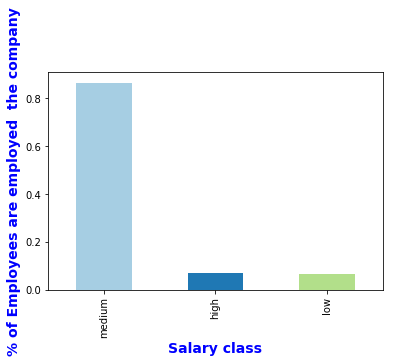

In [52]:
df21['salary'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df21))))
plt.ylabel('% of Employees are employed  the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Salary class', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Projects handled')

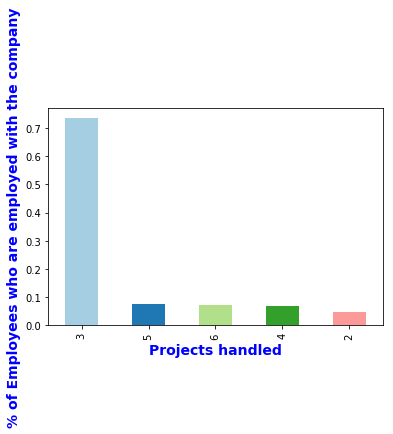

In [53]:
df21['projects'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df21))))
plt.ylabel('% of Employees who are employed with the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Projects handled', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Tenure with company')

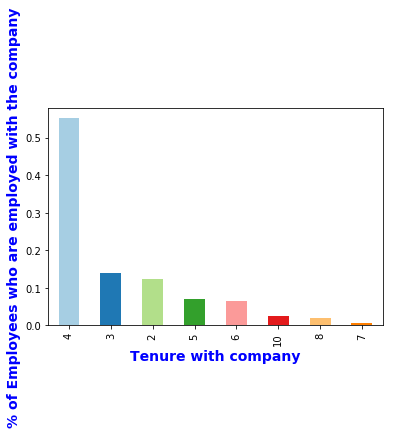

In [54]:
df21['tenure'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df21))))
plt.ylabel('% of Employees who are employed with the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Tenure with company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'satisfaction level with company')

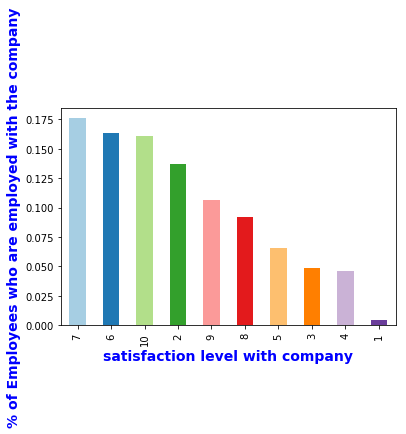

In [55]:
df21['satisfaction'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df21))))
plt.ylabel('% of Employees who are employed with the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('satisfaction level with company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Complaints filed with company')

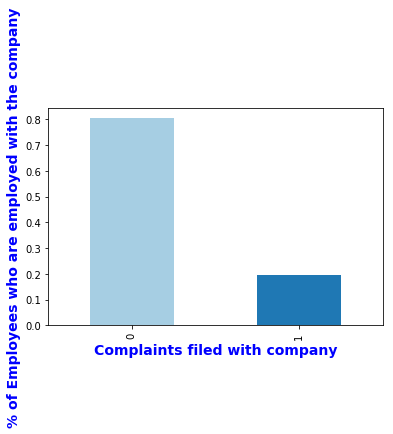

In [56]:
df21['filed_complaint'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df21))))
plt.ylabel('% of Employees who are employed with the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Complaints filed with company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

# Cluster 1 Analysis of variables for employees who left

In [57]:
df22 = df2.query('Attrition_status=="Left"')

In [58]:
df22.head(5)

,Unnamed: 0,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
7,7,Left,admin,4,0,2,0,medium,3,1
11,11,Left,admin,5,0,2,0,medium,3,1
18,18,Left,admin,4,0,2,0,medium,3,1
28,28,Left,admin,4,0,2,0,medium,3,1
30,30,Left,admin,4,0,2,0,medium,3,1


Text(0.5, 0, 'Salary class')

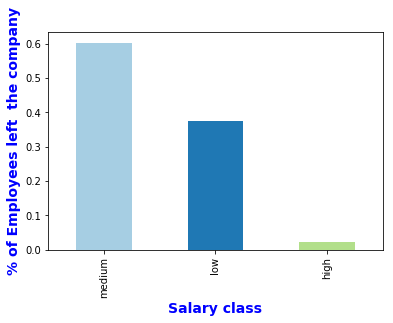

In [59]:
df22['salary'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df22))))
plt.ylabel('% of Employees left  the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Salary class', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Projects handled')

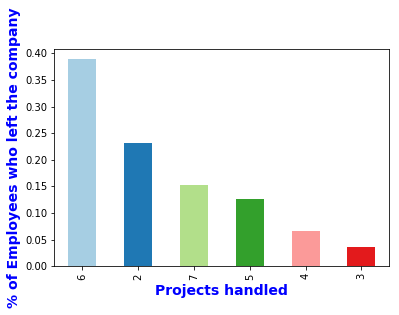

In [60]:
df22['projects'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df22))))
plt.ylabel('% of Employees who left the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Projects handled', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Tenure with company')

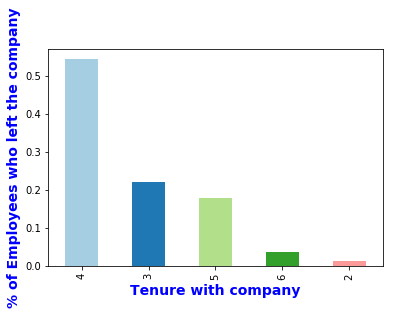

In [61]:
df22['tenure'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df22))))
plt.ylabel('% of Employees who left the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Tenure with company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Satisfaction level')

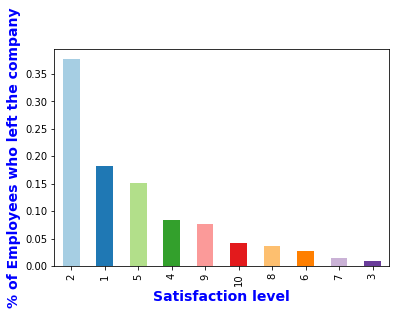

In [62]:
df22['satisfaction'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df22))))
plt.ylabel('% of Employees who left the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Satisfaction level', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Complaints filed with company')

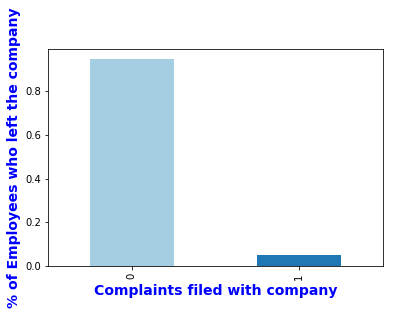

In [63]:
df22['filed_complaint'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df22))))
plt.ylabel('% of Employees who left the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Complaints filed with company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

# Cluster 2 Analysis of variables for employes employed

In [64]:
df31 = df3.query('Attrition_status== "Employed"')

In [65]:
df31.head(5)

,Unnamed: 0,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
2,2,Employed,admin,6,0,2,0,medium,2,2
5,5,Employed,admin,10,1,5,0,medium,2,2
6,6,Employed,admin,4,0,3,0,medium,2,2
9,9,Employed,admin,9,0,3,0,low,2,2
12,12,Employed,admin,4,0,5,0,medium,5,2


In [66]:
df3.shape

(2371, 10)

In [67]:
df31.shape

(2201, 10)

Text(0.5, 0, 'Salary Class')

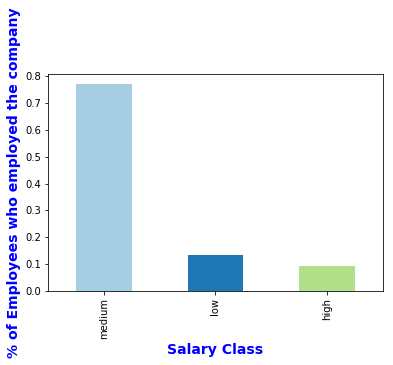

In [68]:
df31['salary'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df31))))
plt.ylabel('% of Employees who employed the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Salary Class', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Projects handled')

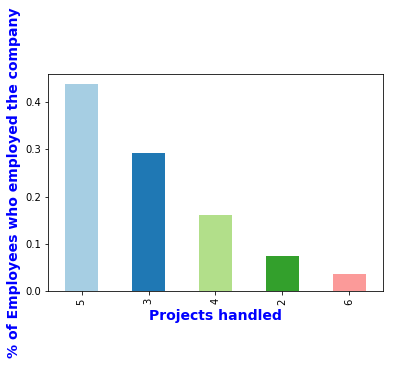

In [69]:
df31['projects'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df31))))
plt.ylabel('% of Employees who employed the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Projects handled', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Tenure with Company')

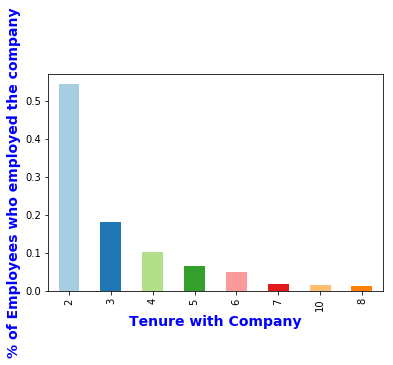

In [70]:
df31['tenure'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df31))))
plt.ylabel('% of Employees who employed the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel("Tenure with Company", fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Satisfaction with Company')

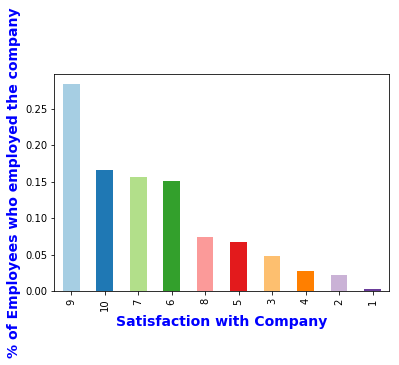

In [71]:
df31['satisfaction'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df31))))
plt.ylabel('% of Employees who employed the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel("Satisfaction with Company", fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Complaints  with Company')

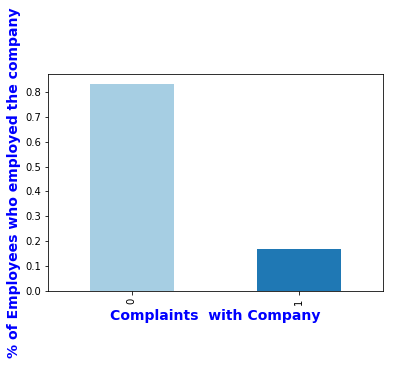

In [72]:
df31['filed_complaint'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df31))))
plt.ylabel('% of Employees who employed the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel("Complaints  with Company", fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

# Cluster 2 Analysis of Employees who left 

In [75]:
df32 = df3.query('Attrition_status== "Left"')

In [76]:
df32.shape

(170, 10)

In [34]:
df32.head(5)

,Unnamed: 0,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
122,122,Left,admin,9,0,5,0,low,5,2
1124,1124,Left,engineering,9,0,5,0,medium,2,2
1206,1206,Left,engineering,9,0,5,0,medium,2,2
2879,2879,Left,finance,9,0,5,0,medium,5,2
2962,2962,Left,finance,9,1,5,0,medium,5,2


Text(0.5, 0, 'Salary Class')

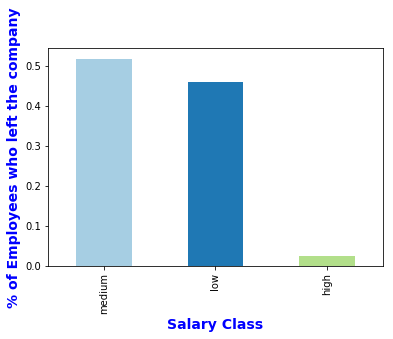

In [77]:
df32['salary'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df32))))
plt.ylabel('% of Employees who left the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Salary Class', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Projects handled')

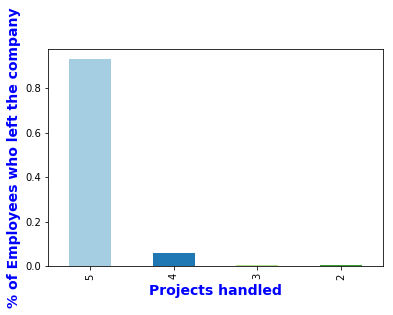

In [78]:
df32['projects'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df32))))
plt.ylabel('% of Employees who left the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel('Projects handled', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Tenure with Company')

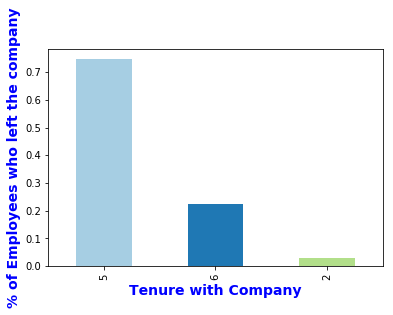

In [79]:
df32['tenure'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df32))))
plt.ylabel('% of Employees who left the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel("Tenure with Company", fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Satisfaction with Company')

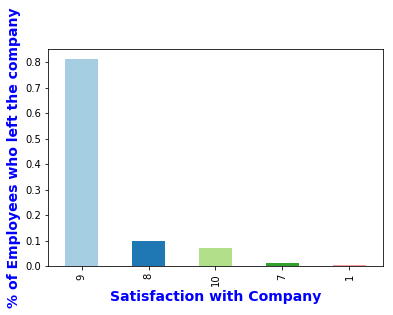

In [80]:
df32['satisfaction'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df32))))
plt.ylabel('% of Employees who left the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel("Satisfaction with Company", fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')

Text(0.5, 0, 'Complaints  with Company')

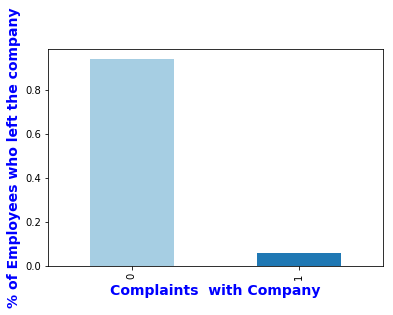

In [81]:
df32['filed_complaint'].value_counts(normalize=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(df32))))
plt.ylabel('% of Employees who left the company', fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')
plt.xlabel("Complaints  with Company", fontweight='bold', color = 'Blue', fontsize='14', horizontalalignment='center')